## ANN using iris dataset

In [1]:
## Import the libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
## download the dataset from website
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)

In [3]:
## Change the string values to integer 
df['species']=df['species'].replace('setosa',0.0)
df['species']=df['species'].replace('virginica',2.0)
df['species']=df['species'].replace('versicolor',1.0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
## Split the indepentent and depentent features
X=df.drop('species', axis=1).values
y=df['species'].values

In [5]:
## Converting our data to tensor
X=torch.FloatTensor(X)
y=torch.LongTensor(y)

In [6]:
## Split our data for train, test, validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=32)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.2,random_state=32)

In [7]:
## Define our model class
class irisClassification(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(4,8)
    self.h1= nn.Linear(8,9)
    self.output = nn.Linear(9,3)

  def forward(self,x):

    x=F.leaky_relu_(self.input(x))
    x=F.leaky_relu_(self.h1(x))
    x=F.softmax(self.output(x), dim=1)

    return x

In [8]:
## Set the manual seed and create and
torch.manual_seed(41)
model=irisClassification()
model

irisClassification(
  (input): Linear(in_features=4, out_features=8, bias=True)
  (h1): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=3, bias=True)
)

In [9]:
## Define loss and optimization for our problem
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
## Define our training as a function
def training(model_v,X_train,y_train,optimizer_v,X_val,y_val):
  epochs =100
  calculate_loss=[]
  val_loss=[]
  train_accuracy=[]

  for epoch in range(epochs):



    y_pred=model_v(X_train)
    # print(y_pred)
    loss = loss_function(y_pred, y_train)
    optimizer_v.zero_grad()
    loss.backward()
    optimizer_v.step()
    calculate_loss.append(loss.item())
    # print("epoch :",epoch,"loss :",loss.item())
    _,y_pred= torch.max(y_pred, 1)
    accuracy = (y_pred == y_train).float().mean()
    train_accuracy.append(accuracy.item())

    model.eval()
    with torch.no_grad():
        y_val_pred = model_v(X_val)
        val_loss_value = loss_function(y_val_pred, y_val)
        val_loss.append(val_loss_value.item())
    # print(loss)
    print("Epoch:", epoch, "Training Loss:", loss.item() ,"Validation Loss:", val_loss_value.item())
  plt.plot(range(epochs), calculate_loss, label='Training Loss')
  plt.plot(range(epochs), val_loss, label='Validation Loss')
  # plt.plot(range(epochs), train_accuracy, label='Training Accuracy')
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.legend()
  plt.show()
  print(accuracy.item())

Epoch: 0 Training Loss: 1.106058955192566 Validation Loss: 1.1084288358688354
Epoch: 1 Training Loss: 1.099714994430542 Validation Loss: 1.110683560371399
Epoch: 2 Training Loss: 1.093537449836731 Validation Loss: 1.1141101121902466
Epoch: 3 Training Loss: 1.0875588655471802 Validation Loss: 1.1187820434570312
Epoch: 4 Training Loss: 1.0820952653884888 Validation Loss: 1.1243482828140259
Epoch: 5 Training Loss: 1.0772696733474731 Validation Loss: 1.1299749612808228
Epoch: 6 Training Loss: 1.0732405185699463 Validation Loss: 1.1348525285720825
Epoch: 7 Training Loss: 1.070006251335144 Validation Loss: 1.1379634141921997
Epoch: 8 Training Loss: 1.0670109987258911 Validation Loss: 1.1383485794067383
Epoch: 9 Training Loss: 1.0637286901474 Validation Loss: 1.1359537839889526
Epoch: 10 Training Loss: 1.0598634481430054 Validation Loss: 1.1312708854675293
Epoch: 11 Training Loss: 1.0552144050598145 Validation Loss: 1.124763011932373
Epoch: 12 Training Loss: 1.0496113300323486 Validation Loss

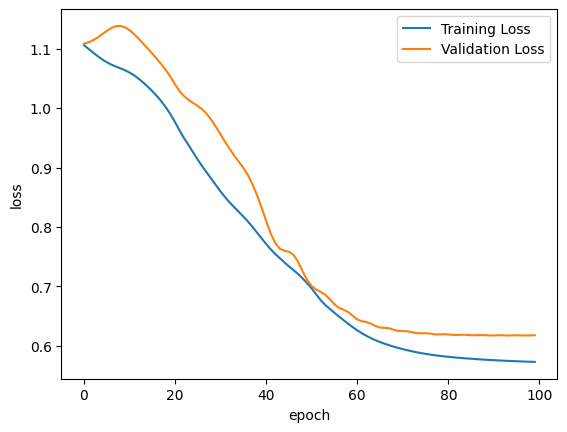

0.9895833134651184


In [11]:
training(model,X_train,y_train,optimizer,X_val,y_val)

In [12]:
## Testing our model, print the each predicted and actual values, calculate accuracy with this and print total number of correct predicted numbers
correct=0
with torch.no_grad():
  for i , data in enumerate(X_test):

    data = data.unsqueeze(0)

    y_valed = torch.softmax(model(data), dim=1)

    print(f' {i+1}.)  {str(y_valed)} \t {y_test[i]} \t { y_valed.argmax().item()}')

    if y_valed.argmax().item() == y_test[i]:
      correct+=1

print(f'we got {correct} correct predictions out of {len(X_test)}.')


 1.)  tensor([[0.2148, 0.5622, 0.2230]]) 	 1 	 1
 2.)  tensor([[0.5759, 0.2121, 0.2120]]) 	 0 	 0
 3.)  tensor([[0.5754, 0.2125, 0.2121]]) 	 0 	 0
 4.)  tensor([[0.2128, 0.5720, 0.2152]]) 	 1 	 1
 5.)  tensor([[0.2121, 0.2126, 0.5753]]) 	 2 	 2
 6.)  tensor([[0.2147, 0.2227, 0.5626]]) 	 2 	 2
 7.)  tensor([[0.5747, 0.2131, 0.2122]]) 	 0 	 0
 8.)  tensor([[0.5756, 0.2124, 0.2121]]) 	 0 	 0
 9.)  tensor([[0.2123, 0.5744, 0.2133]]) 	 1 	 1
 10.)  tensor([[0.5758, 0.2122, 0.2120]]) 	 0 	 0
 11.)  tensor([[0.2125, 0.5734, 0.2141]]) 	 1 	 1
 12.)  tensor([[0.2121, 0.2126, 0.5753]]) 	 2 	 2
 13.)  tensor([[0.2123, 0.5753, 0.2124]]) 	 1 	 1
 14.)  tensor([[0.2122, 0.5758, 0.2120]]) 	 1 	 1
 15.)  tensor([[0.2141, 0.2202, 0.5657]]) 	 2 	 2
 16.)  tensor([[0.2120, 0.2120, 0.5760]]) 	 2 	 2
 17.)  tensor([[0.2188, 0.5407, 0.2405]]) 	 1 	 1
 18.)  tensor([[0.2211, 0.2525, 0.5264]]) 	 2 	 2
 19.)  tensor([[0.2122, 0.5758, 0.2121]]) 	 1 	 1
 20.)  tensor([[0.5759, 0.2121, 0.2120]]) 	 0 	 0
 21.)  te